In [28]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
os.chdir("/clusterfs/jgi/groups/gentech/homes/romalley/full_DAPseq_annotation")

In [4]:
!cat ./raw_data/N4_filtered-annotated-peaks_minfoldch5_minus-2000bp-to-plus-500bp_111623.tsv |grep "Arabidopsis_thaliana_Col-0"|cut -f 20|sort|uniq -c

      1 annotated_peak_region
 274785 cds
  87599 intron
 872870 upstream
 143221 utr5prime


In [5]:
!cat ./raw_data/N4_filtered-annotated-peaks_minfoldch5_genebody_plus_500bpStart-to-plus-600bpStop_111924.tsv |grep "Arabidopsis_thaliana_Col-0"|cut -f 20|sort|uniq -c

      1 annotated_peak_region
 407987 cds
 173633 downstream
 236436 intron
 121029 utr3prime


how many peaks are annotated as in both promoter and genebody regions

In [6]:
import pandas as pd
from glob import glob
import numpy as np

In [30]:
df_pro = pd.read_csv('./raw_data/N4_filtered-annotated-peaks_minfoldch5_minus-2000bp-to-plus-500bp_111623.tsv', sep='\t', header=0)
df_pro = df_pro.loc[df_pro["species"]=="Arabidopsis_thaliana_Col-0"]
df_pro.head()

,peak_chr,peak_start,peak_end,peak_name,peak_foldch,peak_pscore,peak_qscore,peak_summit,feature_chr,feature_source,...,gene,tf,og_targeted_frac,cons_Arabidopsis_thaliana_Col-0,cons_Arabidopsis_lyrata_MN47,cons_Capsella_rubella_Monte_Gargano,cons_Brassica_oleracea_TO1000DH3,n_cons_species_minfrac0,n_species_in_orthogroup,n_cons_species_clade_aware
0,Chr3,15645684,15646225,AT1G01060_A_thaliana_Col-0_DAPi709D10-ORGi5005...,121.602,1156.46,1152.01,268,Chr3,phytozomev12,...,AT3G43750,AT1G01060,0.857143,0.857143,0.285714,0.4,0.000000,3,4,3
1,Chr1,1637949,1638542,AT1G01060_A_thaliana_Col-0_DAPi709D10-ORGi5005...,115.549,1085.10,1080.68,228,Chr1,phytozomev12,...,AT1G05540,AT1G01060,1.000000,1.000000,0.000000,0.5,0.000000,2,4,1
2,Chr1,1637949,1638542,AT1G01060_A_thaliana_Col-0_DAPi709D10-ORGi5005...,115.549,1085.10,1080.68,228,Chr1,phytozomev12,...,AT1G05530,AT1G01060,0.500000,0.500000,0.000000,0.0,0.500000,2,4,1
3,Chr1,18204823,18205351,AT1G01060_A_thaliana_Col-0_DAPi709D10-ORGi5005...,115.549,1085.10,1080.68,268,Chr1,phytozomev12,...,AT1G49220,AT1G01060,0.666667,0.666667,0.666667,1.0,0.333333,4,4,4
4,Chr1,17178696,17179222,AT1G01060_A_thaliana_Col-0_DAPi709D10-ORGi5005...,110.414,1025.15,1020.76,268,Chr1,phytozomev12,...,AT1G45474,AT1G01060,1.000000,1.000000,0.000000,1.0,1.000000,3,4,1


In [31]:
df_gb= pd.read_csv('./raw_data/N4_filtered-annotated-peaks_minfoldch5_genebody_plus_500bpStart-to-plus-600bpStop_111924.tsv', sep='\t', header=0)
df_gb = df_gb.loc[df_gb["species"]=="Arabidopsis_thaliana_Col-0"]
df_gb.head()

,peak_chr,peak_start,peak_end,peak_name,peak_foldch,peak_pscore,peak_qscore,peak_summit,feature_chr,feature_source,...,single_copy_ortho,gene,tf,og_targeted_frac,cons_Arabidopsis_thaliana_Col-0,cons_Arabidopsis_lyrata_MN47,cons_Capsella_rubella_Monte_Gargano,cons_Brassica_oleracea_TO1000DH3,n_cons_species_minfrac0,n_species_in_orthogroup
0,Chr3,15645684,15646225,AT1G01060_A_thaliana_Col-0_DAPi709D10-ORGi5005...,121.6020,1156.460,1152.010,268,Chr3,phytozomev12,...,False,AT3G43740,AT1G01060,1.0,1.0,0.0,0.000000,0.0,1,3
1,Chr3,10891839,10892318,AT1G01060_A_thaliana_Col-0_DAPi709D10-ORGi5005...,118.3000,1117.450,1113.010,250,Chr3,phytozomev12,...,False,AT3G28870,AT1G01060,0.5,0.5,0.0,0.000000,0.0,1,4
2,Chr3,10449558,10450060,AT1G01060_A_thaliana_Col-0_DAPi709D10-ORGi5005...,118.1170,1115.290,1110.850,252,Chr3,phytozomev12,...,False,AT3G28070,AT1G01060,1.0,1.0,0.5,0.333333,0.5,4,4
3,Chr3,10450281,10450581,AT1G01060_A_thaliana_Col-0_DAPi709D10-ORGi5005...,19.4416,103.225,100.876,148,Chr3,phytozomev12,...,False,AT3G28070,AT1G01060,1.0,1.0,0.5,0.333333,0.5,4,4
4,Chr4,2117267,2117827,AT1G01060_A_thaliana_Col-0_DAPi709D10-ORGi5005...,110.4140,1025.150,1020.760,285,Chr4,phytozomev12,...,True,AT4G04330,AT1G01060,1.0,1.0,0.0,0.000000,0.0,1,4


In [17]:
promoter_peak_name = df_pro.loc[df_pro['species']=="Arabidopsis_thaliana_Col-0","peak_name"].unique()

In [18]:
genebody_peak_name = df_gb.loc[df_gb['species']=="Arabidopsis_thaliana_Col-0","peak_name"].unique()

In [27]:
print(len(np.intersect1d(promoter_peak_name,genebody_peak_name)));print(len(promoter_peak_name));print(len(genebody_peak_name))

86363
1250282
926925


In [38]:
display(max(df_gb['summit_to_cds_end']))
display(min(df_gb['summit_to_cds_end']))

600

-26394

(array([2.60000e+01, 2.10000e+01, 1.70000e+01, 4.70000e+01, 2.60000e+01,
        5.60000e+01, 4.10000e+01, 3.90000e+01, 4.30000e+01, 8.80000e+01,
        1.07000e+02, 1.09000e+02, 1.75000e+02, 1.89000e+02, 2.67000e+02,
        4.16000e+02, 5.24000e+02, 7.16000e+02, 9.91000e+02, 1.30700e+03,
        1.91700e+03, 2.99400e+03, 4.86200e+03, 8.56000e+03, 1.46920e+04,
        2.87000e+04, 5.85230e+04, 1.31063e+05, 2.61270e+05, 4.21299e+05]),
 array([-26394. , -25494.2, -24594.4, -23694.6, -22794.8, -21895. ,
        -20995.2, -20095.4, -19195.6, -18295.8, -17396. , -16496.2,
        -15596.4, -14696.6, -13796.8, -12897. , -11997.2, -11097.4,
        -10197.6,  -9297.8,  -8398. ,  -7498.2,  -6598.4,  -5698.6,
         -4798.8,  -3899. ,  -2999.2,  -2099.4,  -1199.6,   -299.8,
           600. ]),
 <BarContainer object of 30 artists>)

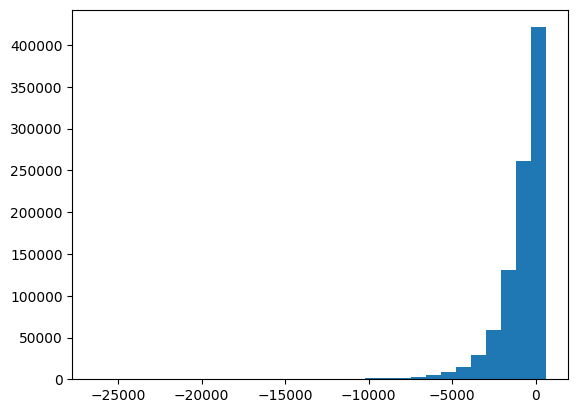

In [39]:
## distance to cds end distribution
plt.hist(df_gb['summit_to_cds_end'], bins=30)

In [40]:
df_gb= pd.read_csv('./raw_data/N4_filtered-annotated-peaks_minfoldch5_genebody_plus_500bpStart-to-plus-600bpStop_111924.tsv', sep='\t', header=0)

In [43]:
df_gb.groupby(['species','n_cons_species_minfrac0']).size()

species                         n_cons_species_minfrac0
Arabidopsis_lyrata_MN47         1                          219823
                                2                          235467
                                3                          225521
                                4                          242272
Arabidopsis_thaliana_Col-0      1                          212070
                                2                          244163
                                3                          236421
                                4                          246431
Brassica_oleracea_TO1000DH3     1                          809186
                                2                          358081
                                3                          270137
                                4                          344725
Capsella_rubella_Monte_Gargano  1                          273174
                                2                          239374
                    

In [ ]:
#### get the common targets of promoter peaks and genebody peaks